# MC: 蒙特卡洛方法
## 1. simple rejection sampling

In [126]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
%matplotlib inline 

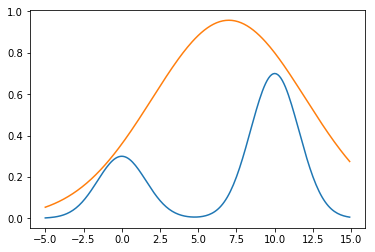

In [127]:
# unnormal p_t
f_t = lambda z: 0.3 * np.exp(-0.2 * z ** 2) + 0.7 * np.exp(-0.2 * (z - 10) ** 2)
q_z = partial(norm.pdf, loc=7, scale=5)
M = 12
X = np.arange(-5, 15, 0.1)
plt.plot(X, f_t(X))
plt.plot(X, M*q_z(X))


total 100000 ac 1118 rj 998882


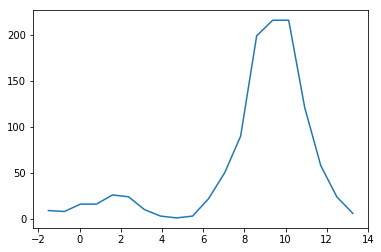

In [128]:
rj, ac = 0, 0  #count
samples = []
for _ in range(1000000):
    u = np.random.uniform()
    x = norm.rvs(loc=7, scale=5)
    if u < f_t(x) / M * q_z(x):
        ac += 1
        samples.append(x)
    else:
        rj += 1

l_ = len(samples)
histogram, bins = np.histogram(samples, 20)
bins = 0.5*(bins[1:] + bins[:-1])
plt.plot(bins, histogram)
print('total {} ac {} rj {}'.format(100000, ac, rj))

*Notes*:
> 1. 接受率很低，受维度灾难影响大，无法扩展到高维。
> 2. q_z 必须是一个能容易采样的概率分布， p_z 可以不用归一化

## 2. simple importance sampling

### p_z和q_z都是概率分布

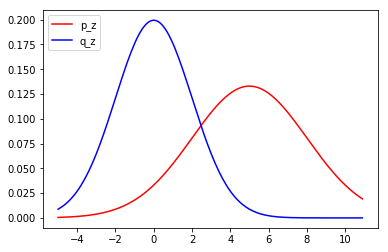

In [129]:
p_z = partial(norm.pdf, loc=5, scale=3)
q_z = partial(norm.pdf, loc=0, scale=2)
f = lambda x: x
X = np.arange(-5, 11, 0.1)
plt.plot(X, p_z(X), color='red', label='p_z')
plt.plot(X, q_z(X), color='blue', label='q_z')
# plt.plot(X, f(X), color='green', label='f_z')
plt.legend(loc='upper left')


*评估期望*$\mathcal{E}[f]$

In [155]:
L = 1000000
# 从q_z中采L个样本,loc=0, scale=2
q_samples = norm.rvs(size=L, loc=0, scale=2)
q_q = q_z(q_samples)
p_q = p_z(q_samples)
f_z = f(q_samples)
w = p_q / q_q
e_f_p = np.mean(w * f_z)

print('E[f]: {}'.format(e_f_p))


E[f]: 4.98131555610797


*Notes:*
> 1. 为保证采样的有效性，p_z 和 q_z 的分布应该有‘充分’的重叠区域。
> 2. 重要性采样本身并没有提供从p_z中采样的方法。
> 3. 对维度灾难敏感

*从p_z中采样：sampling-importance-resampling*
> stage1: $z1, ... , zL \sim q_z$  
> stage2: constructed w1, ... ,wL  
> stage3: choice(z, w, replace=True)  

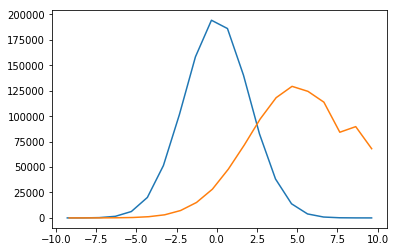

In [156]:
q_resamples = np.random.choice(q_samples, len(q_samples), True, w/np.sum(w))
hist1, bins1 = np.histogram(q_samples, 20)
bins1 = 0.5 * (bins1[1:] + bins1[:-1])
plt.plot(bins1, hist1)
hist2, bins2 = np.histogram(q_resamples, 20)
bins2 = 0.5 * (bins2[1:] + bins2[:-1])
plt.plot(bins2, hist2)
